In [3]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io, color
import matplotlib.pyplot as plt
import argparse
import numpy as np
import pandas as pd
import cv2
import requests
import io
import PIL
from matplotlib import pyplot as plt
from scipy import ndimage

In [2]:
image = cv2.imread("cromitaxpl.jpg", 1)

C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  after removing the cwd from sys.path.


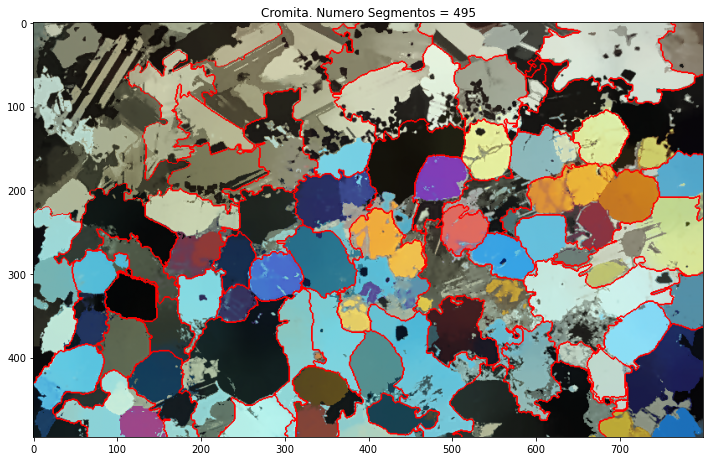

In [3]:
def applySLIC(image, numSegments=100, title=None):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, numSegments, sigma = 1, compactness=1, max_iter=10,convert2lab=True)
    # show the output of SLIC
    fig = plt.figure(figsize=(12,9))
    ax = fig.add_subplot(1, 1, 1)
    bound = mark_boundaries(image, segments, color = (1,0,0))
    if title is not None:
        plt.title(title+f". Numero Segmentos = {len(segments)}") 
    return bound

def applyBlur(img):
    gaussian = cv2.GaussianBlur(img,(5,5),0)
    bilateral =cv2.bilateralFilter(img , 9, 75, 75, cv2.BORDER_DEFAULT);
    meanshift = cv2.pyrMeanShiftFiltering(img,sp=21,sr=50)
    
    return [gaussian, bilateral, meanshift]

def calculateNumberGrains(img):
    
    kernel = np.ones((3,3), np.uint8)


    ret,thresh1 = cv2.threshold(img,30,255,cv2.THRESH_BINARY)
    eroded = cv2.erode(thresh1, kernel, iterations=2)
    dilated = cv2.dilate(eroded, kernel, iterations=2)
    dst = cv2.filter2D(dilated,-1,kernel)
    blur = cv2.GaussianBlur(dst,(5,5),0)
    mask = blur == 255
        
    s = [[1,1,1], [1,1,1], [1,1,1]]

    labeled_mask, num_labels = ndimage.label(mask, structure=s)
    final = color.label2rgb(labeled_mask, bg_label=0)

    return [final, num_labels]

    

def cannyEdge(image, lowval=100, highval=200):
    pass
    
image = cv2.imread("cromitaxpl.jpg", 1)
imageGray = cv2.imread("cromitaxpl.jpg", 0)

slicImage = applySLIC(applyBlur(image)[2], 100, title="Cromita")
plt.imshow(slicImage)

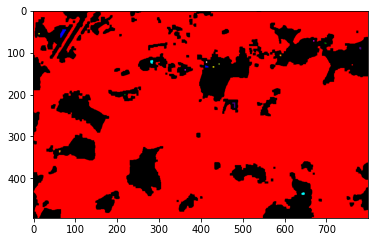

In [16]:
imageGray = cv2.imread("cromitaxpl.jpg", 0)

img, labels = calculateNumberGrains(cv2.cvtColor(applyBlur(image)[2], cv2.COLOR_BGR2GRAY))
plt.imshow(img)


C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  after removing the cwd from sys.path.


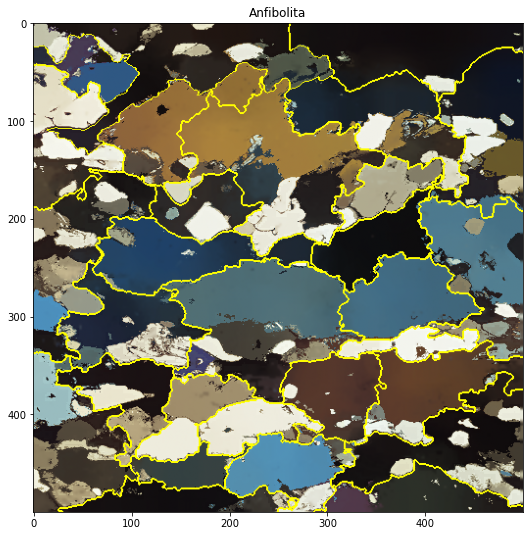

In [24]:
image = cv2.imread("XPL00.jpg", 1)
plt.imshow(applySLIC(applyBlur(image[:500,:500,:])[2], 60, title="Anfibolita"))

C:\Users\IvanE\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  after removing the cwd from sys.path.


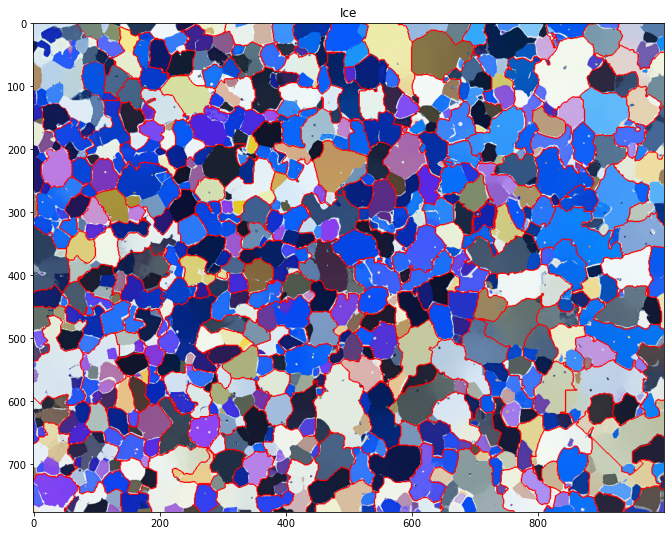

In [42]:
image = cv2.imread("ice.jpg", 1)
plt.imshow(applySLIC(applyBlur(image[:1000,:1000,::-1])[2], 400, title="Ice"))

In [ ]:
def print_images(*images):
    subplots = len(images)

    plt.figure(figsize=(15,5))
    for i,img in enumerate(images) :
    plt.subplot(1,subplots,(i+1))
    plt.imshow(img,interpolation='none')
    plt.grid(0)
    plt.show()

def img_color_channel_change(img):
  # RGB
    img_red,img_green,img_blue = cv2.split(img)
    # Gray
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # HSV hue-saturation-value
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    img_h,img_s,img_v = cv2.split(img_hsv)
    # HSL hue-saturation-lightness
    img_hsL = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
    img_h2,img_s2,img_v2 = cv2.split(img_hsv)
    # YCBCR
    img_YBR = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
    img_Y,img_B2,img_R2 = cv2.split(img_YBR)

    return img_hsv,img_hsL,img_YBR,img_gray


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_borders(img,img_real, gthan=50):
    kernel = np.ones((3,3),np.uint8)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    binary = cv2.threshold(closing,127,255,cv2.THRESH_BINARY)[1]
    w, h ,x= img_real.shape
    original = np.ones((w,h,x), dtype="uint8")*255
    cnts = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    found = []
    for c in cnts:
        area = cv2.contourArea(c)
        if area > gthan:
            cv2.drawContours(original,[c], 0, ( 200, 0, 128 ), 2)
            found.append(c)
    contours = cv2.addWeighted(img_real,0.4,original,0.6,0) 

    return contours, found

def go_canny(image, lw=150, hg=250):
    image = cv2.GaussianBlur(image,(5,5),0)
    return cv2.Canny(image, lw, hg)

image = cv2.imread("olivino.jpg", 1)
canny_image = go_canny(image)
original, num = draw_borders(canny_image, image,100)


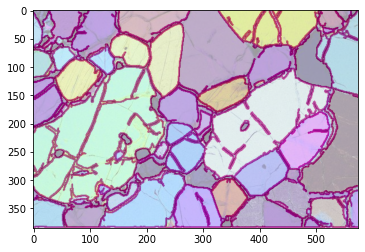

In [35]:
plt.imshow(original)

In [36]:
print(len(num))

65


In [24]:
labels = np.asarray(num)

In [25]:
labels.shape

(232,)

In [26]:
len(labels)

232